In [1]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
# import math functions
import math

In [3]:
#Plot import
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
# ML imports
from sklearn import linear_model 
from sklearn.datasets import load_iris


In [5]:
iris = load_iris()

In [6]:
X = iris.data

Y = iris.target

In [11]:
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
iris_data = DataFrame(X,columns = ['Sepal Length','Sepal Width','Petal Length', 'Petal Width'])

In [13]:
iris_target = DataFrame(Y,columns = ['Species'])

In [14]:
iris_target.tail()

,Species
145,2
146,2
147,2
148,2
149,2


In [16]:
# changing numeric values to their actual names Changing column values
def flower(num):
    if num == 0:
        return 'Sentosa'
    elif num == 1:
        return 'Versicolour'
    else:
        return 'Virginica'

In [17]:
iris_target['Species'] = iris_target['Species'].apply(flower) 

In [19]:
 iris_target.head()

,Species
0,Sentosa
1,Sentosa
2,Sentosa
3,Sentosa
4,Sentosa


In [20]:
iris = pd.concat([iris_data, iris_target],axis=1)

In [21]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Sentosa
1,4.9,3.0,1.4,0.2,Sentosa
2,4.7,3.2,1.3,0.2,Sentosa
3,4.6,3.1,1.5,0.2,Sentosa
4,5.0,3.6,1.4,0.2,Sentosa


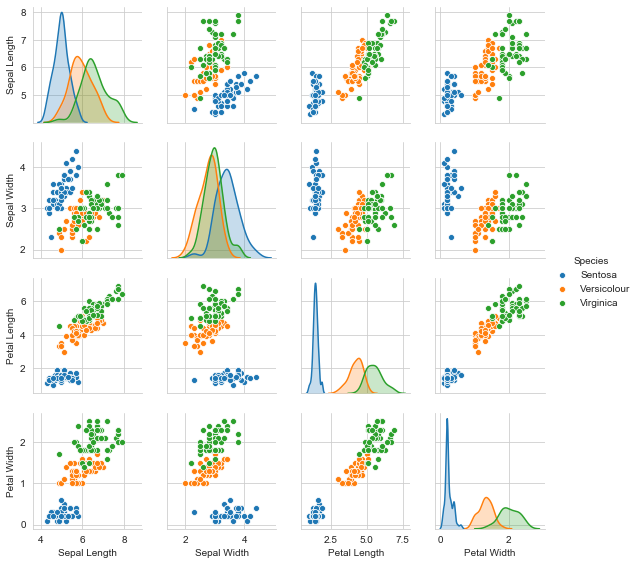

In [23]:
# Data Visualis analysis
sns.pairplot(iris,hue = 'Species', height = 2)

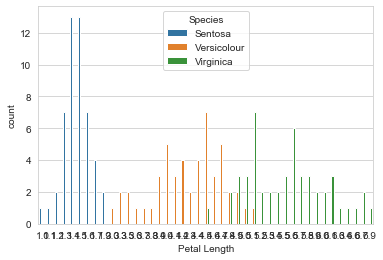

In [39]:
# petal legth distribution for all species
sns.countplot('Petal Length',data = iris, hue = 'Species')

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [43]:
logreg = LogisticRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 3) #taking testing sample for 30% species

In [44]:
logreg.fit(X_train, Y_train)

C:\Users\dharm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dharm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
from sklearn import metrics

In [46]:
Y_pred = logreg.predict(X_test) #predicting X data test

In [47]:
print (metrics.accuracy_score(Y_test, Y_pred))

1.0


In [48]:
# using knn for multi class classification
from sklearn.neighbors import KNeighborsClassifier

In [50]:
KNN = KNeighborsClassifier(n_neighbors = 6 ) #n_neighbor is value for k=6

In [51]:
 KNN.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [52]:
Y_pred = KNN.predict(X_test)

In [53]:
print (metrics.accuracy_score(Y_test, Y_pred))

0.9555555555555556


In [58]:
KNN = KNeighborsClassifier(n_neighbors = 1)

In [59]:
KNN.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [60]:
print (metrics.accuracy_score(Y_test, Y_pred))

0.9555555555555556


In [61]:
k_range = range(1,21) #testing values from 1 - 20
accuracy = []

In [63]:
for k in k_range:
    
    KNN =  KNeighborsClassifier(n_neighbors = k)
    KNN.fit(X_train, Y_train)
    Y_pred = KNN.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

Text(0, 0.5, 'Testing Accuracy')

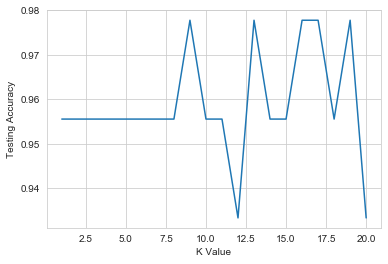

In [64]:
plt.plot(k_range , accuracy)
plt.xlabel('K Value')
plt.ylabel('Testing Accuracy')